In [10]:
# !pip install timeseries-generator

from timeseries_generator import *
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.set_option('display.max_rows', 50)

# Lib for time series generation
Link to examples: https://github.com/Nike-Inc/timeseries-generator/tree/master/examples

Focused on generation of sales data, but can be used in a general sense as well.

Important components:
- LinearTrend
- WhiteNoise
- SinusoidalFactor (-> Seasonality)
- WeekdayFactor (-> one could add re-occuring and common effects)
- HolidayFactor (-> one could add re-occuring and rare effects)
Link to most important source files: https://github.com/Nike-Inc/timeseries-generator/tree/master/timeseries_generator

Can also be used in a multivariate sense (with individual factors for each variable) and external data could also be integrated.

In [11]:
def fade_dataframes(data_bef: pd.DataFrame, data_after: pd.DataFrame, fade_start_index: int, fade_end_index: int):
    data_combined = data_bef.copy()
    fade_per_step = 1.0 / (fade_end_index - fade_start_index + 1)
    for step, index in enumerate(range(fade_start_index, fade_end_index), 1):
        for col in data_combined.columns:
            if col == 'date':
                continue
            data_combined.at[index, col] = data_bef.loc[index][col] * (1.0 - step * fade_per_step) + \
                                           data_after.loc[index][col] * (step * fade_per_step)
    data_combined.loc[fade_end_index:] = data_after.loc[fade_end_index:]
    return data_combined

In [21]:
# linear trend
lt_small = LinearTrend(coef=1, offset=0.01, col_name="linear_trend")
lt_small_neg = LinearTrend(coef=-1, offset=0.01, col_name="linear_trend")
lt_big = LinearTrend(coef=5, offset=0.01, col_name="linear_trend")

# seasonality
seasonal_component_short_low_ampl = SinusoidalFactor(
    col_name="seasonal_factor",
    wavelength=100,
    amplitude=0.1,
    phase=-100/4,
    mean=1
)
seasonal_component_short_high_ampl = SinusoidalFactor(
    col_name="seasonal_factor",
    wavelength=100,
    amplitude=0.2,
    phase=-100/4,
    mean=1
)
seasonal_component_long_low_ampl = SinusoidalFactor(
    col_name="seasonal_factor",
    wavelength=200,
    amplitude=0.1,
    phase=-200/4,
    mean=1
)
seasonal_component_long_high_ampl = SinusoidalFactor(
    col_name="seasonal_factor",
    wavelength=200,
    amplitude=0.2,
    phase=-200/4,
    mean=1
)

# white noise
wn_small = WhiteNoise(stdev_factor=0.05)
wn_big = WhiteNoise(stdev_factor=0.1)

# start="01-01-2014", end="06-23-2019" -> 2000 Datenpunkte
# start="01-01-2014", end="09-26-2016" -> 1000 Datenpunkte
# start="01-01-2014", end="05-15-2015" -> 500 Datenpunkte

## Single changes

'\ncombined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, \n                                fade_start_index=fade_start_index,\n                                fade_end_index=fade_end_index)\n'

2000


<ipython-input-22-9972ff543149>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = data_bef.append(data_after, ignore_index=True)


<IPython.core.display.Javascript object>


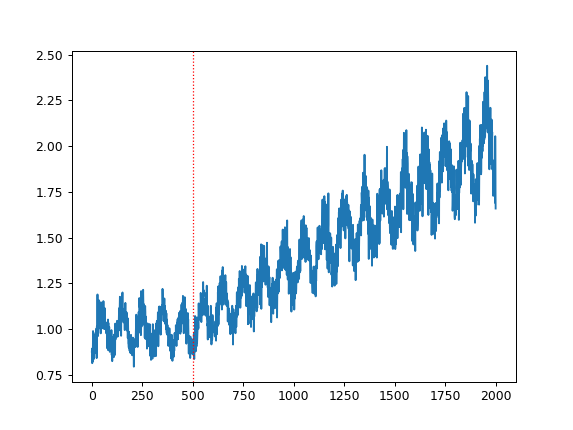

<AxesSubplot:>

In [22]:

g = Generator(base_value=1, factors={wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="01-01-2014", end="05-15-2015"))
data_bef = g.generate()

g = Generator(base_value=1, factors={lt_small, wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="05-16-2015", end="06-23-2019"))
data_after = g.generate()

fade_start_index = 500
"""
combined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, 
                                fade_start_index=fade_start_index,
                                fade_end_index=fade_end_index)
"""
combined_data = data_bef.append(data_after, ignore_index=True)
print(len(combined_data))
%matplotlib notebook
combined_data['value'].plot()

combined_data['value'].to_csv('single_changes/short-season_low-ampl_wn-small_cp500_small-trend.csv', index=0)

plt.axvline(fade_start_index, linewidth=1, color='r', linestyle=":")

2000


<IPython.core.display.Javascript object>


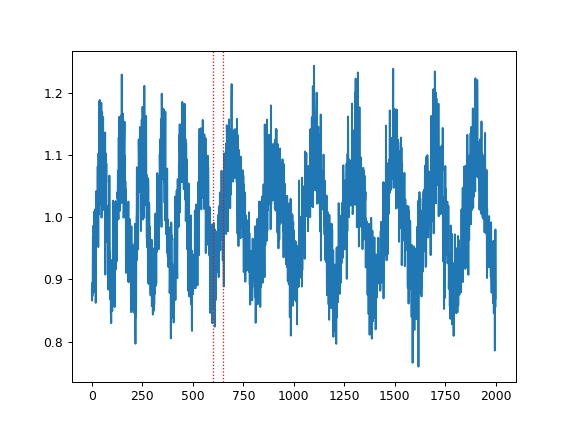

<AxesSubplot:>

In [23]:
g = Generator(base_value=1, factors={wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="01-01-2014", end="06-23-2019"))
data_bef = g.generate()

g = Generator(base_value=1, factors={wn_small, seasonal_component_long_low_ampl},
              date_range=pd.date_range(start="01-01-2014", end="06-23-2019"))
data_after = g.generate()

fade_start_index = 600
fade_end_index = 650

combined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, 
                                fade_start_index=fade_start_index,
                                fade_end_index=fade_end_index)
print(len(combined_data))
# combined_data = data_bef.append(data_after, ignore_index=True)
%matplotlib notebook
combined_data['value'].plot()

combined_data['value'].to_csv('single_changes/short-season_low-ampl_wn-small_cp600-650_long-season_low-ampl.csv', index=0)

plt.axvline(fade_start_index, linewidth=1, color='r', linestyle=":")
plt.axvline(fade_end_index, linewidth=1, color='r', linestyle=":")

2000


<IPython.core.display.Javascript object>


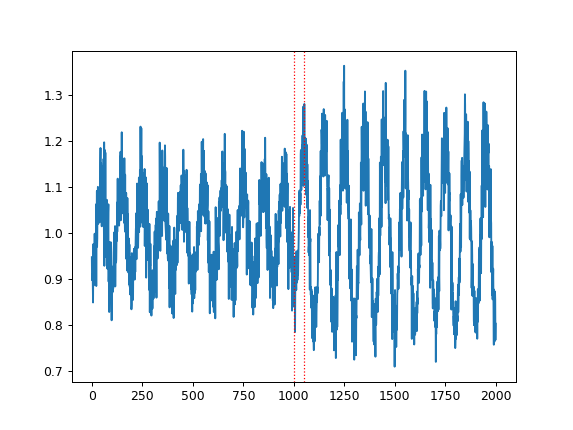

<AxesSubplot:>

In [24]:
g = Generator(base_value=1, factors={wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="01-01-2014", end="06-23-2019"))
data_bef = g.generate()

g = Generator(base_value=1, factors={wn_small, seasonal_component_short_high_ampl},
              date_range=pd.date_range(start="01-01-2014", end="06-23-2019"))
data_after = g.generate()

fade_start_index = 1000
fade_end_index = 1050

combined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, 
                                fade_start_index=fade_start_index,
                                fade_end_index=fade_end_index)
print(len(combined_data))
# combined_data = data_bef.append(data_after, ignore_index=True)
%matplotlib notebook
combined_data['value'].plot()

combined_data['value'].to_csv('single_changes/short-season_low-ampl_wn-small_cp1000-1050_short-season_high-ampl.csv', index=0)

plt.axvline(fade_start_index, linewidth=1, color='r', linestyle=":")
plt.axvline(fade_end_index, linewidth=1, color='r', linestyle=":")

'\ncombined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, \n                                fade_start_index=fade_start_index,\n                                fade_end_index=fade_end_index)\n'

2000


<ipython-input-25-ebed695650de>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = data_bef.append(data_after, ignore_index=True)


<IPython.core.display.Javascript object>


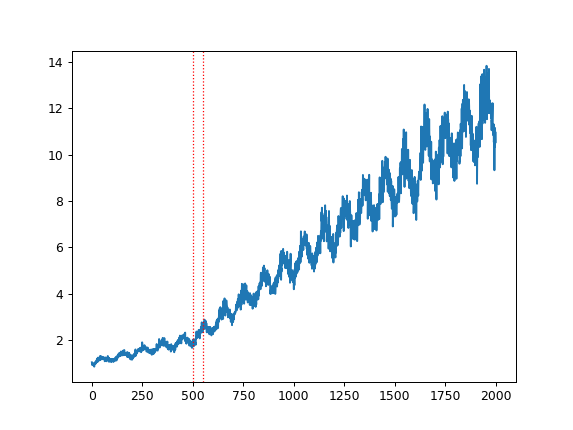

<AxesSubplot:>

In [25]:

g = Generator(base_value=1, factors={lt_small, wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="01-01-2014", end="05-15-2015"))
data_bef = g.generate()

g = Generator(base_value=2, factors={lt_big, wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="05-16-2015", end="06-23-2019"))
data_after = g.generate()

fade_start_index = 500
fade_end_index = 550
"""
combined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, 
                                fade_start_index=fade_start_index,
                                fade_end_index=fade_end_index)
"""
combined_data = data_bef.append(data_after, ignore_index=True)
print(len(combined_data))
%matplotlib notebook
combined_data['value'].plot()

combined_data['value'].to_csv('single_changes/short-season_low-ampl_wn-small_trend-small_cp500_trend-big.csv', index=0)

plt.axvline(fade_start_index, linewidth=1, color='r', linestyle=":")
plt.axvline(fade_end_index, linewidth=1, color='r', linestyle=":")

## Multi changes

750

'\ncombined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, \n                                fade_start_index=fade_start_index,\n                                fade_end_index=fade_end_index)\n'

2000


<ipython-input-26-8d1887a0ff02>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = data_bef.append(data_after, ignore_index=True)
<ipython-input-26-8d1887a0ff02>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_after_2, ignore_index=True)


<IPython.core.display.Javascript object>


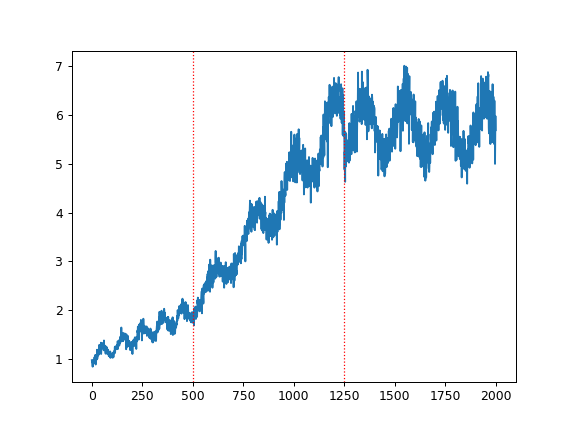

<AxesSubplot:>

In [26]:
lt_big = LinearTrend(coef=2, offset=0.01, col_name="linear_trend")
g = Generator(base_value=1, factors={lt_small, wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="01-01-2014", end="05-15-2015"))
data_bef = g.generate()

g = Generator(base_value=2, factors={lt_big, wn_small, seasonal_component_long_low_ampl},
              date_range=pd.date_range(start="05-16-2015", end="06-03-2017"))
data_after = g.generate()
len(data_after)

"""
combined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, 
                                fade_start_index=fade_start_index,
                                fade_end_index=fade_end_index)
"""
combined_data = data_bef.append(data_after, ignore_index=True)

g = Generator(base_value=data_after['value'][len(data_after)-1], 
              factors={wn_small, seasonal_component_long_low_ampl},
              date_range=pd.date_range(start="06-04-2017", end="06-23-2019"))
data_after_2 = g.generate()

combined_data = combined_data.append(data_after_2, ignore_index=True)
print(len(combined_data))
%matplotlib notebook
combined_data['value'].plot()

combined_data['value'].to_csv('multi_changes/short-season_low-ampl_trend_small_cp500_big-trend_long-season_cp1250_no-trend.csv', index=0)

plt.axvline(500, linewidth=1, color='r', linestyle=":")
plt.axvline(1250, linewidth=1, color='r', linestyle=":")

750

'\ncombined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, \n                                fade_start_index=fade_start_index,\n                                fade_end_index=fade_end_index)\n'

2000


<ipython-input-27-5b2a9d024d20>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = data_bef.append(data_after, ignore_index=True)
<ipython-input-27-5b2a9d024d20>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_after_2, ignore_index=True)


<IPython.core.display.Javascript object>


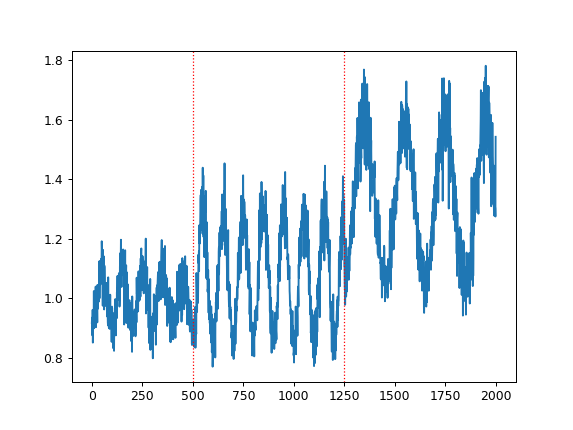

<AxesSubplot:>

In [27]:
lt_big = LinearTrend(coef=2, offset=0.01, col_name="linear_trend")
g = Generator(base_value=1, factors={wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="01-01-2014", end="05-15-2015"))
data_bef = g.generate()

g = Generator(base_value=data_bef['value'][len(data_bef)-1]+0.2, 
              factors={wn_small, seasonal_component_short_high_ampl},
              date_range=pd.date_range(start="05-16-2015", end="06-03-2017"))
data_after = g.generate()
len(data_after)

"""
combined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, 
                                fade_start_index=fade_start_index,
                                fade_end_index=fade_end_index)
"""
combined_data = data_bef.append(data_after, ignore_index=True)

g = Generator(base_value=data_after['value'][len(data_after)-1], 
              factors={wn_small, seasonal_component_long_high_ampl},
              date_range=pd.date_range(start="06-04-2017", end="06-23-2019"))
data_after_2 = g.generate()

combined_data = combined_data.append(data_after_2, ignore_index=True)
print(len(combined_data))
%matplotlib notebook
combined_data['value'].plot()

combined_data['value'].to_csv('multi_changes/short-season_low-ampl__cp500_short-season_high-ampl_cp1250_long-season_high-ampl.csv', index=0)

plt.axvline(500, linewidth=1, color='r', linestyle=":")
plt.axvline(1250, linewidth=1, color='r', linestyle=":")

750

'\ncombined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, \n                                fade_start_index=fade_start_index,\n                                fade_end_index=fade_end_index)\n'

1500
2000


<ipython-input-28-0ed5b2d2069a>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = data_bef.append(data_after, ignore_index=True)
<ipython-input-28-0ed5b2d2069a>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_after_2, ignore_index=True)
<ipython-input-28-0ed5b2d2069a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_after_3, ignore_index=True)


<IPython.core.display.Javascript object>


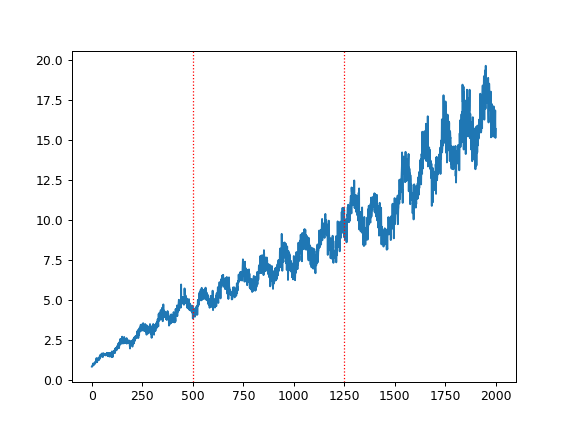

<AxesSubplot:>

In [28]:
lt_big = LinearTrend(coef=4, offset=0.01, col_name="linear_trend")
g = Generator(base_value=1, factors={lt_big, wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="01-01-2014", end="05-15-2015"))
data_bef = g.generate()
lt_neg = LinearTrend(coef=-0.1, offset=0.01, col_name="linear_trend")
g = Generator(base_value=data_bef['value'][len(data_bef)-1]+0.2, 
              factors={lt_small, wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="05-16-2015", end="06-03-2017"))
data_after = g.generate()
len(data_after)

"""
combined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, 
                                fade_start_index=fade_start_index,
                                fade_end_index=fade_end_index)
"""
combined_data = data_bef.append(data_after, ignore_index=True)

g = Generator(base_value=data_after['value'][len(data_after)-1], 
              factors={lt_neg, wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="06-04-2017", end="02-08-2018"))
data_after_2 = g.generate()

combined_data = combined_data.append(data_after_2, ignore_index=True)
print(len(combined_data))

lt_small = LinearTrend(coef=0.5, offset=0.01, col_name="linear_trend")
g = Generator(base_value=data_after_2['value'][len(data_after_2)-1], 
              factors={lt_small, wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="02-09-2018", end="06-23-2019"))
data_after_3 = g.generate()

combined_data = combined_data.append(data_after_3, ignore_index=True)
print(len(combined_data))

%matplotlib notebook
combined_data['value'].plot()

combined_data['value'].to_csv('multi_changes/short-season_low-ampl_big-trend_cp500_small-trend_cp1250_neg-trend_cp1500_small-trend.csv', index=0)

plt.axvline(500, linewidth=1, color='r', linestyle=":")
plt.axvline(1250, linewidth=1, color='r', linestyle=":")

750

'\ncombined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, \n                                fade_start_index=fade_start_index,\n                                fade_end_index=fade_end_index)\n'

1500
2000


<ipython-input-29-a53f40ceff35>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = data_bef.append(data_after, ignore_index=True)
<ipython-input-29-a53f40ceff35>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_after_2, ignore_index=True)
<ipython-input-29-a53f40ceff35>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_after_3, ignore_index=True)


<IPython.core.display.Javascript object>


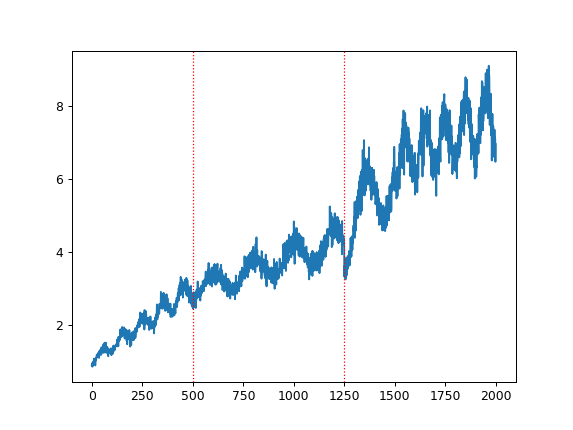

<AxesSubplot:>

In [29]:
lt_big = LinearTrend(coef=2, offset=0.01, col_name="linear_trend")
g = Generator(base_value=1, factors={lt_big, wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="01-01-2014", end="05-15-2015"))
data_bef = g.generate()
g = Generator(base_value=data_bef['value'][len(data_bef)-1]+0.2, 
              factors={lt_small, wn_small, seasonal_component_long_low_ampl},
              date_range=pd.date_range(start="05-16-2015", end="06-03-2017"))
data_after = g.generate()
len(data_after)

"""
combined_data = fade_dataframes(data_bef=data_bef, data_after=data_after, 
                                fade_start_index=fade_start_index,
                                fade_end_index=fade_end_index)
"""
combined_data = data_bef.append(data_after, ignore_index=True)

g = Generator(base_value=data_after['value'][len(data_after)-1], 
              factors={lt_small, wn_small, seasonal_component_long_high_ampl},
              date_range=pd.date_range(start="06-04-2017", end="02-08-2018"))
data_after_2 = g.generate()

combined_data = combined_data.append(data_after_2, ignore_index=True)
print(len(combined_data))

lt_small = LinearTrend(coef=0.2, offset=0.01, col_name="linear_trend")
g = Generator(base_value=data_after_2['value'][len(data_after_2)-1], 
              factors={lt_small, wn_small, seasonal_component_short_low_ampl},
              date_range=pd.date_range(start="02-09-2018", end="06-23-2019"))
data_after_3 = g.generate()

combined_data = combined_data.append(data_after_3, ignore_index=True)
print(len(combined_data))

%matplotlib notebook
combined_data['value'].plot()

combined_data['value'].to_csv('multi_changes/multi-trend-period-amplitude-changes.csv', index=0)

plt.axvline(500, linewidth=1, color='r', linestyle=":")
plt.axvline(1250, linewidth=1, color='r', linestyle=":")